In [2]:
# works after:
#  1. pipx runpip eth-ape install notebook matplotlib
#  2. ape console
#  3. In [1]: from notebook import notebookapp as app
#     In [2]: app.launch_new_instance()

# NOTE: for some reason `ape-notebook` plugin not displaying in cli when run `ape -h`, so needed to
#       pipx runpip install notebook into my ape package env. Then run `ape-notebook` one line src from
#      `ape console`.
# TODO: figure out why ape-notebook plugin not working for me.

from ape import accounts, chain, Contract, networks

In [4]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [5]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [6]:
# get the balance of account 0
dev.balance

0

In [7]:
current_block = chain.blocks[-1].number
current_block

15396535

In [8]:
dblocks = int(86400*90/12) # last 90 d
start_block = current_block - dblocks
start_block

14748535

In [9]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [10]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [11]:
steth.balanceOf(curve_steth)

581506180404776305447325

In [12]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [13]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [14]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

CPU times: user 292 ms, sys: 40.2 ms, total: 333 ms
Wall time: 1.58 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x4ea89cfe927ba8cbaa6299fc24add2cf4a9dbdaa7af3...,15393536,0x72d74577761f2f3c7282c6f5fe005d084c225af44f97...,25,15
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x76df1fbf2da4ee64e40e3f2903aa6cd65656c21cfcd8...,15393626,0x723a8c37bbbb807147c9f0327bac04738dc636fcee4b...,537,239
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x01fe96eaB6B2F7DD516A5460675a8c092...,0xe39229c03d90a7a05b3206b7f7dce8a921eba46123ec...,15393939,0xd99cd6c8aae411bdacf42fe7d01ef1161fc467671deb...,452,245
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x68c29bb02152bcd84863d7fec89b52791fa744a8195b...,15393979,0xc76c2e239bec17568d8f8146e7b9b40e5e29b154e0db...,120,45
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x81C46fECa27B31F3ADC2b91eE4be9717d...,0xaafbbb376f81ec00f4c710b2874fef69277ce5e28c66...,15394124,0xf7001fa2c071e8ba2bcd2435266b9c99e85d2d00ba49...,448,175
...,...,...,...,...,...,...,...,...
58,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,68,99
59,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,83,99
60,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,87,99
61,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xD275E5cb559D6Dc236a5f8002A5f0b4c8...,0xaaedf819b7c48880a3ef70315bf3ba13c605d300f98b...,15396518,0x8e0c5ba5e1ec75f816ad33bd3ec2f84a910383eaf02c...,14,1


In [15]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [16]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
1    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
2    {'buyer': '0x01fe96eaB6B2F7DD516A5460675a8c092...
3    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
4    {'buyer': '0x81C46fECa27B31F3ADC2b91eE4be9717d...
5    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
6    {'buyer': '0x91000060399502550000007bbfBA0052F...
7    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
8    {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...
9    {'buyer': '0xE4000004000bd8006e00720000d27d1FA...
Name: event_arguments, dtype: object

In [17]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [18]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8',
 'sold_id': 1,
 'tokens_sold': 678591094880935624,
 'bought_id': 0,
 'tokens_bought': 660560095860248881}

In [19]:
# ok great. let's look a bit farther into the past to start_block from above. see how long it takes
%time query_swaps = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps

CPU times: user 37.7 s, sys: 5.72 s, total: 43.5 s
Wall time: 3min 14s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xa4bdec62ae15188f0b45e20ce54ab6d7ec0f7d64ea35...,14748577,0x8df278c069d41e1a8b0bab4dc2d8119ac88b043bedf6...,51,7
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xD9F01a5e8801032785bEb6DC4f242287d...,0xd07301249cc8f1a4f14b8d611038a0013e9057ffd870...,14748583,0x0e4978d24723c4eaf6c688af4b08cd5e3532768a5ea2...,69,98
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf9c44b7763e0ba518a4c45c6457997b5a1454d82a183...,14748586,0xa329eb47bb3bcbd2e4a5fd07a10d19ba73866da54133...,60,29
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0xfd9019622d3b289ff007157d6dd368b25eab52c83d09...,14748602,0x4fae047116cb9897d37b6c0abd9e40cad7d46c1774e3...,119,253
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x516bc8a4f97b7f10e8f70357688906a8bf50becad56b...,14748605,0xc4893f256e429240eb3e74703c8ccaac29c57657ec10...,214,162
...,...,...,...,...,...,...,...,...
22299,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,68,99
22300,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,83,99
22301,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,87,99
22302,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xD275E5cb559D6Dc236a5f8002A5f0b4c8...,0xaaedf819b7c48880a3ef70315bf3ba13c605d300f98b...,15396518,0x8e0c5ba5e1ec75f816ad33bd3ec2f84a910383eaf02c...,14,1


In [20]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [21]:
steth.address == coin_indices[-1]

True

In [22]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [23]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8', 'sold_id': 1, 'tokens_sold': 678591094880935624, 'bought_id': 0, 'tokens_bought': 660560095860248881}
price: 0.973818143037288


In [24]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [25]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [26]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xa4bdec62ae15188f0b45e20ce54ab6d7ec0f7d64ea35...,14748577,0x8df278c069d41e1a8b0bab4dc2d8119ac88b043bedf6...,51,7,0.993263
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xD9F01a5e8801032785bEb6DC4f242287d...,0xd07301249cc8f1a4f14b8d611038a0013e9057ffd870...,14748583,0x0e4978d24723c4eaf6c688af4b08cd5e3532768a5ea2...,69,98,0.993262
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0000000000007F150Bd6f54c40A34d7C3...,0xf9c44b7763e0ba518a4c45c6457997b5a1454d82a183...,14748586,0xa329eb47bb3bcbd2e4a5fd07a10d19ba73866da54133...,60,29,0.993263
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0xfd9019622d3b289ff007157d6dd368b25eab52c83d09...,14748602,0x4fae047116cb9897d37b6c0abd9e40cad7d46c1774e3...,119,253,0.993261
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x220bdA5c8994804Ac96ebe4DF184d25e5...,0x516bc8a4f97b7f10e8f70357688906a8bf50becad56b...,14748605,0xc4893f256e429240eb3e74703c8ccaac29c57657ec10...,214,162,0.993261
...,...,...,...,...,...,...,...,...,...
22299,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x0031130c56162e00A7e9C01eE4147b11c...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,68,99,0.974094
22300,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,83,99,0.974094
22301,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0xd8677db6827a6d65e8cd5cf2473f4ba3b523d7677eb8...,15396500,0x5444c814827f870368fd4f648c13af8b4df179538911...,87,99,0.974094
22302,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xD275E5cb559D6Dc236a5f8002A5f0b4c8...,0xaaedf819b7c48880a3ef70315bf3ba13c605d300f98b...,15396518,0x8e0c5ba5e1ec75f816ad33bd3ec2f84a910383eaf02c...,14,1,0.973960


<AxesSubplot:xlabel='block_number'>

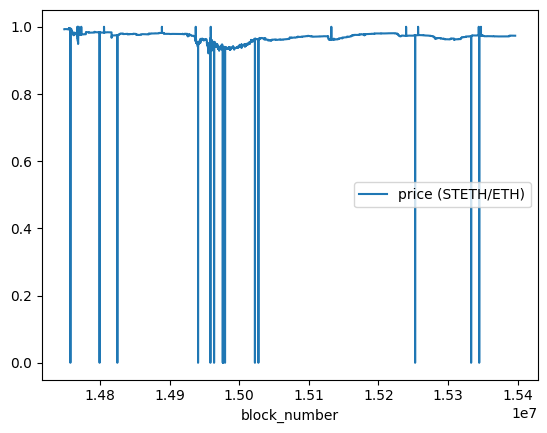

In [27]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

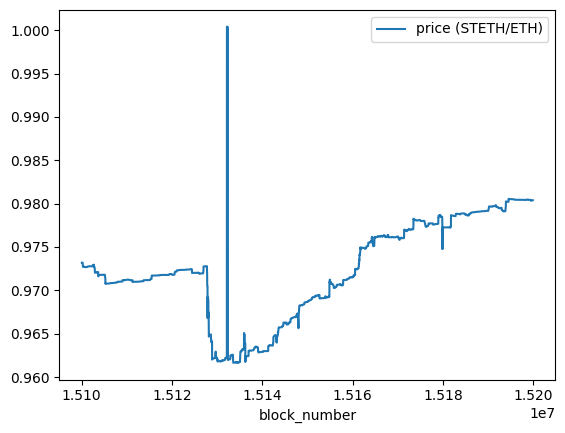

In [41]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

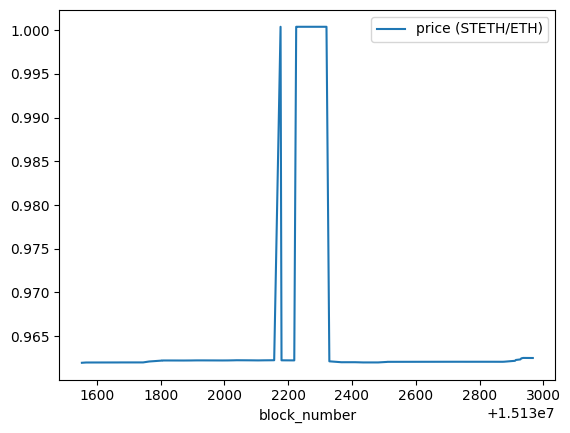

In [45]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [29]:
# TODO: add some smoothing in for price